<div style="display:float">
  <h1 style="margin-top: 36px; font-size: 32px; float:left">Sklearn: Dealing with Messy Data</h1>
  <img style="vertical-align:middle; float:right" src="http://gntlearning.com/wp-content/uploads/2021/05/Small_Logo-278x64.jpg" width=250px>
</div>

Data:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import Lasso

## Investigate Data

In [ ]:
raw_df_train = pd.read_csv('train.csv')
raw_df_test = pd.read_csv('test.csv')
display(raw_df_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
raw_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

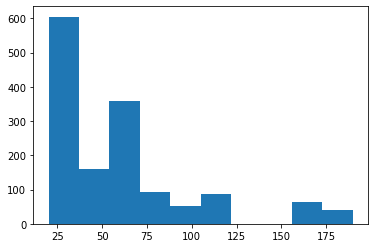

In [ ]:
plt.hist(raw_df_train['MSSubClass'])
raw_df_train['MSSubClass'].unique()

In [ ]:
col_types = {
  'cat': ['MSZoning', 'BsmtFullBath', 'Neighborhood', 'BsmtExposure'],
  'cont': ['OverallQual', 'GrLivArea', 'YearBuilt', 'OverallCond', 'TotalBsmtSF', 'LotArea','GarageArea'],
  'gen_cat': ['YearBinned'],
  'gen_bi': ['HasGarage'],
  'targets': ['SalePrice'],
}

In [ ]:
for col in col_types['cat']:
    print("\n" + col)
    print(raw_df_train[col].value_counts())
    print("Number of Missing Values:", raw_df_train[col].isna().sum())


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Number of Missing Values: 0

BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
Number of Missing Values: 0

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Number of Missing Values: 0

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Number of Missing Values: 38



OverallQual


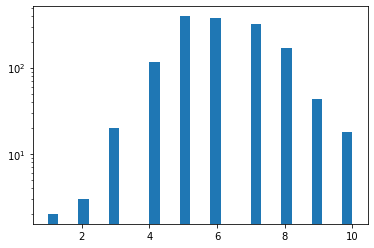

Number of Missing Values: 0

GrLivArea


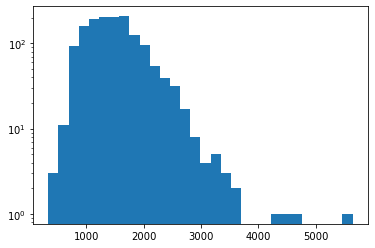

Number of Missing Values: 0

YearBuilt


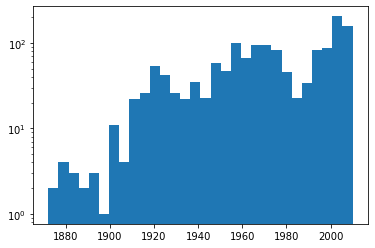

Number of Missing Values: 0

OverallCond


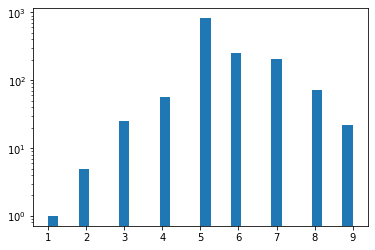

Number of Missing Values: 0

TotalBsmtSF


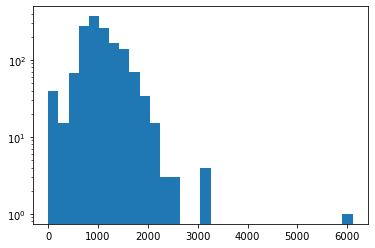

Number of Missing Values: 0

LotArea


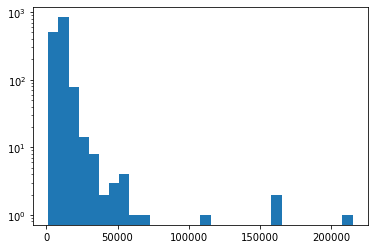

Number of Missing Values: 0

GarageArea


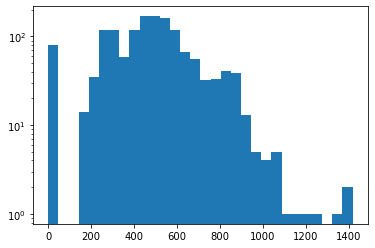

Number of Missing Values: 0


In [ ]:
for col in col_types['cont']:
    print("\n" + col)
    plt.hist(raw_df_train[col], log=True, bins=30)
    plt.show()
    print("Number of Missing Values:", raw_df_train[col].isna().sum())

In [ ]:
# raw_df_train[col_types['cat']+col_types['cont']].query('TotalBsmtSF > 3000')

In [ ]:
# plt.hist(np.log(raw_df_train['LotArea']), bins=30)

In [ ]:
np.where(raw_df_train['GarageArea']>0, 1, 0)

array([1, 1, 1, ..., 1, 1, 1])

(array([364.,   0., 338.,   0.,   0., 313.,   0., 420.,   0.,  25.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

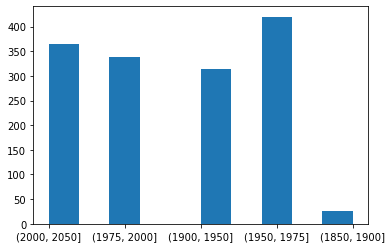

In [ ]:
plt.hist(pd.cut(raw_df_train['YearBuilt'],[1850,1900,1950,1975,2000,2050]).astype(str))

In [ ]:
# df_train = raw_df_train[col_types['cat']].copy()
# df_train['BsmtFullBath'] = np.where(df_train['BsmtFullBath']>1, '2+', df_train['BsmtFullBath'].astype(str))
# df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('No Basement')
# df_train

## Apply Cleanup

In [ ]:
def clean_data(raw_df):
    df = pd.DataFrame()
    
    for col in col_types['cat']:
        if col == 'BsmtFullBath':
            df[col] = np.where(raw_df['BsmtFullBath']>1, '2+', raw_df['BsmtFullBath'].astype(str))
        elif col == 'BsmtExposure':
            df[col] = raw_df['BsmtExposure'].fillna('No Basement')
        else:
            df[col] = raw_df[col]
            
    for col in col_types['cont']:
        if col == 'YearBuilt':
            df['YearBinned'] = pd.cut(raw_df['YearBuilt'],[1850,1900,1950,1975,2000,2050]).astype(str)
            df[col] = raw_df[col]
        elif col == 'GarageArea':
            df['HasGarage'] = np.where(raw_df[col]>0, 1, 0)
            df[col] = raw_df[col].fillna(0)
        elif col == 'LotArea':
            df[col] = np.log(raw_df[col])
        elif col == 'TotalBsmtSF':
            df[col] = raw_df[col].fillna(0)
        else:
            df[col] = raw_df[col]
            
    for col in col_types['targets']:
        if col == 'SalePrice':
            if col in raw_df.columns:
                df[col] = np.log(raw_df[col])
            
    return df

In [ ]:
bad_train_index = [948, # basement sqrt inconsistent with BsmtExposure
                   ]

df_train = clean_data(raw_df_train.drop(bad_train_index))
df_test = clean_data(raw_df_test)

df_train_cat = df_train[col_types['cat']+col_types['gen_cat']]
df_test_cat = df_test[col_types['cat']+col_types['gen_cat']]

df_train_cont = df_train[col_types['cont']+col_types['gen_bi']]
df_test_cont = df_test[col_types['cont']+col_types['gen_bi']]

In [ ]:
# raw_df_train[raw_df_train['BsmtExposure'].isna() ^ (raw_df_train['TotalBsmtSF']==0)]

## Encode Catagorical and Scale Continous

In [ ]:
pd.get_dummies(df_train, columns=col_types['cat']+col_types['gen_cat'])

,OverallQual,GrLivArea,YearBuilt,OverallCond,TotalBsmtSF,LotArea,HasGarage,GarageArea,SalePrice,MSZoning_C (all),...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,"YearBinned_(1850, 1900]","YearBinned_(1900, 1950]","YearBinned_(1950, 1975]","YearBinned_(1975, 2000]","YearBinned_(2000, 2050]"
0,7,1710,2003,5,856,9.041922,1,548,12.247694,0,...,0,0,0,1,0,0,0,0,0,1
1,6,1262,1976,8,1262,9.169518,1,460,12.109011,0,...,0,1,0,0,0,0,0,0,1,0
2,7,1786,2001,5,920,9.328123,1,608,12.317167,0,...,0,0,1,0,0,0,0,0,0,1
3,7,1717,1915,5,756,9.164296,1,642,11.849398,0,...,0,0,0,1,0,0,1,0,0,0
4,8,2198,2000,5,1145,9.565214,1,836,12.429216,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,1999,5,953,8.976768,1,460,12.072541,0,...,0,0,0,1,0,0,0,0,1,0
1456,6,2073,1978,6,1542,9.486076,1,500,12.254863,0,...,0,0,0,1,0,0,0,0,1,0
1457,7,2340,1941,9,1152,9.109636,1,252,12.493130,0,...,0,0,0,1,0,0,1,0,0,0
1458,5,1078,1950,6,1078,9.181632,1,240,11.864462,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_train_cat)
x_train_cat = encoder.transform(df_train_cat).todense()
x_test_cat = encoder.transform(df_test_cat.fillna('unknown')).todense()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_train_cont)
x_train_cont = scaler.transform(df_train_cont)
x_test_cont = scaler.transform(df_test_cont)

In [ ]:
x_train = np.concatenate([x_train_cat, x_train_cont], axis=1)
x_test = np.concatenate([x_test_cat, x_test_cont], axis=1)
y_train = df_train[col_types['targets']].values

## Simple Model Test

In [ ]:
model = Lasso(1e-2)
model.fit(x_train, y_train)
log_preds = model.predict(x_test)
pred = np.exp(log_preds)

In [ ]:
check = df_train.copy()
check['lasso_est'] = model.predict(x_train)
check

,MSZoning,BsmtFullBath,Neighborhood,BsmtExposure,OverallQual,GrLivArea,YearBinned,YearBuilt,OverallCond,TotalBsmtSF,LotArea,HasGarage,GarageArea,SalePrice,lasso_est
0,RL,1,CollgCr,No,7,1710,"(2000, 2050]",2003,5,856,9.041922,1,548,12.247694,12.296607
1,RL,0,Veenker,Gd,6,1262,"(1975, 2000]",1976,8,1262,9.169518,1,460,12.109011,12.029524
2,RL,1,CollgCr,Mn,7,1786,"(2000, 2050]",2001,5,920,9.328123,1,608,12.317167,12.315662
3,RL,1,Crawfor,No,7,1717,"(1900, 1950]",1915,5,756,9.164296,1,642,11.849398,12.160511
4,RL,1,NoRidge,Av,8,2198,"(1975, 2000]",2000,5,1145,9.565214,1,836,12.429216,12.440450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,0,Gilbert,No,6,1647,"(1975, 2000]",1999,5,953,8.976768,1,460,12.072541,12.024225
1456,RL,1,NWAmes,No,6,2073,"(1975, 2000]",1978,6,1542,9.486076,1,500,12.254863,12.120782
1457,RL,0,Crawfor,No,7,2340,"(1900, 1950]",1941,9,1152,9.109636,1,252,12.493130,12.081970
1458,RL,1,NAmes,Mn,5,1078,"(1900, 1950]",1950,6,1078,9.181632,1,240,11.864462,11.802188


Text(0, 0.5, 'predicted log(SalePrice)')

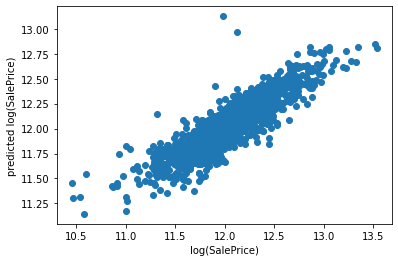

In [ ]:
plt.scatter(check['SalePrice'], check['lasso_est'])
plt.xlabel('log(SalePrice)')
plt.ylabel('predicted log(SalePrice)')

Text(0, 0.5, 'predicted SalePrice')

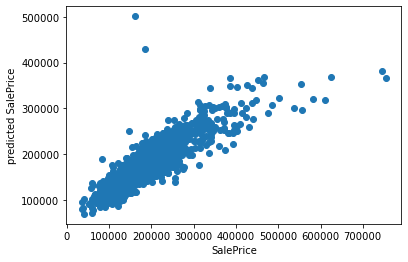

In [ ]:
plt.scatter(np.exp(check['SalePrice']), np.exp(check['lasso_est']))
plt.xlabel('SalePrice')
plt.ylabel('predicted SalePrice')